In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt

from pandas.plotting import parallel_coordinates
from math import sqrt

%matplotlib inline

from platform import python_version
print(python_version())

3.8.8


In [24]:
#file_name = '../original/D31.csv'
#file_name = '../original/g2-2-50.csv'
#file_name = '../original/g2-2-30.csv'
#file_name = '../original/diabetes.csv'

#file_name = '../noised/g2-2-30.csv'
#file_name = '../evaluation.csv'

#file_name = '../gaussian100.csv'
#file_name = '../CE3/iris.csv'
#file_name = '../CE3/wine.csv'
#file_name = '../CE3/wdbc.csv'
#file_name = '../CE3/glass.csv'

#file_name = '../original/t4.8k.csv'
#file_name = '../original/t5.8k.csv'
#file_name = '../original/t8.8k.csv'
#file_name = '../original/t7.10k.csv'

#file_name = '../original/varying_densities.csv'
#file_name = '../original/unbalance.csv'
file_name = '../original/circles.csv'


#file_name = '../sampled_df.csv'
#file_name = '../Files/sampled_df2.csv'
data = pd.read_csv(file_name)

In [25]:
folder_name = '../images-visual'
split_arr = file_name.split('/')
identity_name = split_arr[len(split_arr)-1].replace('.csv','').lower()
new_file_name = identity_name
identity_name = identity_name.replace('.','-')
identity_name = identity_name.replace('_','-')
identity_name = identity_name.replace(' ','-')
print(identity_name)
print(data.shape)

circles
(2600, 3)


In [26]:
sampled_df = data.copy()
sampled_df.shape
label_col_name = 'L'

In [27]:
sampled_df.shape

(2600, 3)

In [28]:
print(file_name)

#IRIS Dataset -OR- Four Featured datasets
if 'iris' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4']

#WINE Dataset -OR- Thirteen Featured datasets
elif 'wine' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10', 
                'Col11', 'Col12', 'Col13']

#WDBC Dataset -OR- Thirty Featured datasets
elif 'wdbc' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10',
                'Col11', 'Col12', 'Col13', 'Col14','Col15', 'Col16', 'Col17', 'Col18', 'Col19', 'Col20',
                'Col21', 'Col22', 'Col23', 'Col24','Col25', 'Col26', 'Col27', 'Col28', 'Col29', 'Col30']

#GLASS Dataset -OR- Nine Featured datasets
elif 'glass' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9']

#Diabetes Dataset -OR- Nine Featured datasets
elif 'diabetes' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8']

#Other Dataset -OR- Two Featured datasets
else:
    features = ['Col1', 'Col2']


select_df = sampled_df[features]
#X = StandardScaler().fit_transform(select_df)

print(features)

../original/circles.csv
['Col1', 'Col2']


In [29]:
import csv

def write_to_file(file_name, values, header_names):
    with open(file_name, 'w') as writeFile:
        writer = csv.writer(writeFile)
        writer.writerow(header_names)
        writer.writerows(values)

Text(0, 0.5, 'Number of futurestud.io Tutorials')

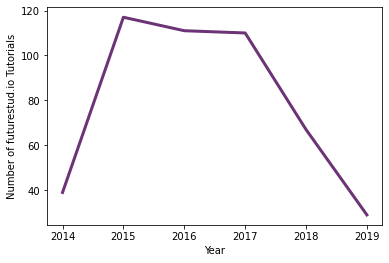

In [30]:
year = [2014, 2015, 2016, 2017, 2018, 2019]  
tutorial_count = [39, 117, 111, 110, 67, 29]

plt.plot(year, tutorial_count, color="#6c3376", linewidth=3)  
plt.xlabel('Year')  
plt.ylabel('Number of futurestud.io Tutorials')  
#plt.savefig('images/line_plot.pdf')  

#No need to include plt.show() if you have used savefig(), although, if you want to use then use it at then end.
#plt.show() 


Total Inside:  2460
Total Outliers:  140
[-1  0  1]
-1
[0 1]


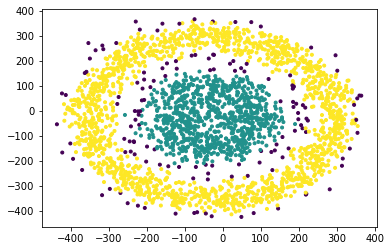

In [31]:
import hdbscan
if 't7.10k' in file_name:
    db = hdbscan.HDBSCAN(min_cluster_size=50, min_samples=12) # Use for dataset t7.10k
elif 't8.8k' in file_name:    
    db = hdbscan.HDBSCAN(min_cluster_size=30, min_samples=10) # Use for dataset t8.8k
else:
    db = hdbscan.HDBSCAN(min_cluster_size=30, min_samples=13) # Use for other dataset

#db = hdbscan.HDBSCAN(metric='precomputed')

#X = StandardScaler().fit_transform(select_df)
db.fit(select_df)
clusters_labels = db.labels_
sampled_df['L'] = clusters_labels
plt.scatter(sampled_df['Col1'],sampled_df['Col2'], marker='.', c=db.labels_)

#plt.savefig('line_plot.pdf')  

cleaned_df = sampled_df[sampled_df.L != -1]

print("Total Inside: ", len(sampled_df[sampled_df.L != -1]))
print("Total Outliers: ", len(sampled_df[sampled_df.L == -1]))
print(np.unique(db.labels_))
print(db.labels_.min())

##################################
for i in np.sort(np.unique(cleaned_df[label_col_name])):
    if i == 0:
        break
    cleaned_df.L[cleaned_df.L == i] = i-1


print(np.unique(cleaned_df[label_col_name]))
##################################



In [32]:
header_names = features
header_names.append("L")

write_to_file('../result2/' + new_file_name + '.csv', np.array(cleaned_df), header_names)

In [33]:
def plot_custom_clusters(final_list, clusters_labels, size, colors, description, image_name, alpha=1, beta=0, not_outlier=False):
    final_list = np.array(final_list) 
    
    if final_list.size > 0:
        for obj in final_list:
            if not_outlier and clusters_labels[tuple(obj)] -1:
                continue
            
            col = colors[clusters_labels[tuple(obj)]]
            plt.plot(obj[0], obj[1], '.', color=col)
        #plt.title(str(description))

        plt.gca().axes.get_yaxis().set_visible(False)
        plt.gca().axes.get_xaxis().set_visible(False)
        plt.savefig(image_name + '.pdf')  
        
        #No need to include plt.show() if you have used savefig(), although, if you want to use then use it at then end.
        #plt.show() 

In [34]:
import random

num_of_clusters = 31
colors = ['red', 'green', 'blue', 'brown', 'cyan', 'purple', 'yellow', 'magenta']
for each in np.linspace(0, 1, num_of_clusters, retstep=False):
    colors.append(plt.cm.Spectral(each))
colors.append('black')
print("Colors: ", len(colors))


Colors:  40


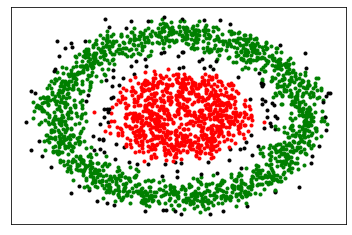

In [35]:
final_list = []
clusters_labels = {}
for i in range(sampled_df.shape[0]):
    obj = (sampled_df['Col1'][i], sampled_df['Col2'][i])
    
    if obj not in clusters_labels:
        clusters_labels[obj] = int(sampled_df['L'][i]) 
        #clusters_labels[obj] = -1 
    
    if obj not in final_list:
        final_list.append(obj)
plot_custom_clusters(final_list, clusters_labels, 5, colors, "HDBSCAN Result: ", folder_name + '/' + identity_name + '-hdbscan-result')

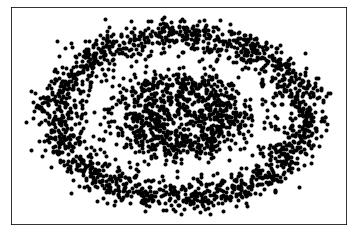

In [36]:
final_list = []
clusters_labels = {}
for i in range(sampled_df.shape[0]):
    obj = (sampled_df['Col1'][i], sampled_df['Col2'][i])
    
    if obj not in clusters_labels:
        #clusters_labels[obj] = int(sampled_df['L'][i]) 
        clusters_labels[obj] = -1
    
    if obj not in final_list:
        final_list.append(obj)
plot_custom_clusters(final_list, clusters_labels, 5, colors, "Origional Points: ", folder_name + '/' + identity_name + '-original-result')